<center>
# ПРИЛОЖЕНИЕ 4
<center>
# РЕШЕНИЕ ДОМАШНЕГО ЗАДАНИЯ 1

## Подготовка данных в pandas

In [1]:
# импортируем необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='Verdana')

In [2]:
# записываем CSV-файл в объект DataFrame
data = pd.read_csv('Data/Churn_logreg.csv', 
                   encoding='cp1251', sep=';')

In [3]:
# выводим первые 5 наблюдений датафрейма
data.head()

,longdist,internat,local,int_disc,billtype,pay,age,gender,marital,children,income,churn
0,"27,09",0,"39,74",Нет,Бюджетный,CC,35.0,Женский,Женат,0.0,77680,Остается
1,NaN,0,"46,31",Нет,NaN,NaN,53.0,Мужской,Одинокий,1.0,"37111,5",Остается
2,"23,76",0,NaN,NaN,Бюджетный,Auto,NaN,Женский,NaN,1.0,"37079,4",Остается
3,"9,4",NaN,"13,9",Нет,NaN,CH,NaN,Мужской,Одинокий,NaN,81997,Остается
4,"14,15",0,"108,43",Да,Бесплатный,Auto,39.0,Женский,Одинокий,0.0,"16829,6",Остается


In [4]:
# смотрим типы переменных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 12 columns):
longdist    4430 non-null object
internat    4427 non-null object
local       4428 non-null object
int_disc    4430 non-null object
billtype    4427 non-null object
pay         4429 non-null object
age         4428 non-null float64
gender      4430 non-null object
marital     4427 non-null object
children    4430 non-null float64
income      4430 non-null object
churn       4431 non-null object
dtypes: float64(2), object(10)
memory usage: 415.5+ KB


In [5]:
# заменяем запятые на точки и преобразуем в тип float
for i in ['longdist', 'internat', 'local', 'income']:
    data[i] = data[i].str.replace(',', '.').astype('float')
data.head()

,longdist,internat,local,int_disc,billtype,pay,age,gender,marital,children,income,churn
0,27.09,0.0,39.74,Нет,Бюджетный,CC,35.0,Женский,Женат,0.0,77680.0,Остается
1,NaN,0.0,46.31,Нет,NaN,NaN,53.0,Мужской,Одинокий,1.0,37111.5,Остается
2,23.76,0.0,NaN,NaN,Бюджетный,Auto,NaN,Женский,NaN,1.0,37079.4,Остается
3,9.40,NaN,13.90,Нет,NaN,CH,NaN,Мужской,Одинокий,NaN,81997.0,Остается
4,14.15,0.0,108.43,Да,Бесплатный,Auto,39.0,Женский,Одинокий,0.0,16829.6,Остается


In [6]:
# смотрим типы переменных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 12 columns):
longdist    4430 non-null float64
internat    4427 non-null float64
local       4428 non-null float64
int_disc    4430 non-null object
billtype    4427 non-null object
pay         4429 non-null object
age         4428 non-null float64
gender      4430 non-null object
marital     4427 non-null object
children    4430 non-null float64
income      4430 non-null float64
churn       4431 non-null object
dtypes: float64(6), object(6)
memory usage: 415.5+ KB


In [7]:
# смотрим статистики для количественных переменных
data.describe()

,longdist,internat,local,age,children,income
count,4430.000000,4427.000000,4428.000000,4428.000000,4430.000000,4430.000000
mean,13.638023,0.835044,51.361093,57.562331,0.988939,50296.423896
std,9.393025,2.233639,54.685012,22.832404,0.824448,28439.435264
min,0.000000,0.000000,0.050000,18.000000,0.000000,110.280000
25%,5.170000,0.000000,13.460000,38.000000,0.000000,25445.600000
50%,13.680000,0.000000,35.010000,58.000000,1.000000,50290.700000
75%,22.080000,0.000000,71.660000,77.000000,2.000000,75004.500000
max,29.980000,9.950000,450.620000,97.000000,2.000000,99832.900000


In [8]:
# смотрим статистики для категориальных переменных,
# кроме зависимой переменной churn, создав список
# категориальных переменных
categorical_columns = [c for c in data.loc[:, data.columns != 'churn'] if data[c].dtype.name == 'object']
data[categorical_columns].describe()

,int_disc,billtype,pay,gender,marital
count,4430,4427,4429,4430,4427
unique,2,2,4,4,5
top,Нет,Бюджетный,CC,Женский,Женат
freq,3054,2244,2561,2240,2620


In [9]:
# смотрим уникальные значения
# категориальных переменных
for c in categorical_columns:
    print(data[c].unique())

['Нет' nan 'Да']
['Бюджетный' nan 'Бесплатный']
['CC' nan 'Auto' 'CH' 'CD']
['Женский' 'Мужской' nan 'Женский&*' 'Мужской&*']
['Женат' 'Одинокий' nan '_Одинокий' '_Женат' 'Же&нат']


In [10]:
# смотрим частоты категорий для
# категориальных переменных
for c in categorical_columns:
    print(data[c].value_counts(dropna=False))

Нет    3054
Да     1376
NaN       1
Name: int_disc, dtype: int64
Бюджетный     2244
Бесплатный    2183
NaN              4
Name: billtype, dtype: int64
CC      2561
CH       977
Auto     889
CD         2
NaN        2
Name: pay, dtype: int64
Женский      2240
Мужской      2183
Женский&*       4
Мужской&*       3
NaN             1
Name: gender, dtype: int64
Женат        2620
Одинокий     1800
NaN             4
_Женат          3
Же&нат          2
_Одинокий       2
Name: marital, dtype: int64


In [11]:
# удаляем лишние символы в категориях переменных
# gender и marital
for i in ['gender', 'marital']:
    data[i] = data[i].str.replace('[*&_]', '')

# смотрим результаты
for i in ['gender', 'marital']:
    print(data[i].value_counts(dropna=False))

Женский    2244
Мужской    2186
NaN           1
Name: gender, dtype: int64
Женат       2625
Одинокий    1802
NaN            4
Name: marital, dtype: int64


In [12]:
# заменяем редкую категорию модой
data.at[data['pay'] == 'CD', 'pay'] = 'CC'
data['pay'].value_counts(dropna = False)

CC      2563
CH       977
Auto     889
NaN        2
Name: pay, dtype: int64

In [13]:
# пишем функцию, создающую парные взаимодействия
def make_conj(df, feature1, feature2):
    df[feature1 + "_" + feature2] = df[feature1].astype('object') + " + " + df[feature2].astype('object')

In [14]:
# применяем функцию
make_conj(data, 'gender', 'marital')

In [15]:
# поделим возраст на длительность междугородних звонков в минутах
data['ratio'] = data['age'] / data['longdist']
# заменяем бесконечные значения на 1
data['ratio'].replace([np.inf, -np.inf], 1, inplace=True)

In [16]:
# поделим длительность междугородних звонков в минутах на
# длительность международных звонков в минутах
data['ratio2'] = data['longdist'] / data['internat']
# заменяем бесконечные значения на 0
data['ratio2'].replace([np.inf, -np.inf], 0, inplace=True)

In [17]:
# поделим доход на возраст
data['ratio3'] = data['income'] / data['age']
# заменяем бесконечные значения на 0
data['ratio3'].replace([np.inf, -np.inf], 0, inplace=True)

In [18]:
# поделим возраст на количество детей
data['ratio4'] = data['age'] / data['children']
# заменяем бесконечные значения на 0
data['ratio4'].replace([np.inf, -np.inf], 0, inplace=True)

In [19]:
# разбиваем данные на обучающую и контрольную выборки
train = data.sample(frac=0.7, random_state=200)
test = data.drop(train.index)

In [20]:
# выводим информацию о количестве пропусков
# по каждой переменной в полученных выборках
print(train.isnull().sum())
print(test.isnull().sum())

longdist            1
internat            4
local               2
int_disc            0
billtype            4
pay                 2
age                 2
gender              1
marital             3
children            1
income              1
churn               0
gender_marital      3
ratio               3
ratio2            336
ratio3              2
ratio4              2
dtype: int64
longdist            0
internat            0
local               1
int_disc            1
billtype            0
pay                 0
age                 1
gender              0
marital             1
children            0
income              0
churn               0
gender_marital      1
ratio               1
ratio2            161
ratio3              1
ratio4              1
dtype: int64


In [21]:
# заменяем пропуски в количественных переменных средними, создав
# список количественных переменных для работы с циклом
numerical_columns = train.dtypes[train.dtypes != 'object'].index 
for i in numerical_columns:
    train[i].fillna(train[i].mean(), inplace=True)
    test[i].fillna(train[i].mean(), inplace=True)

In [22]:
# заменяем пропуски в категориальных переменных модой, не забываем пересоздать список
# категориальных предикторов для работы с циклом, потому что появилась новая переменная
# gender_marital и в ней есть пропуски, нуждающиеся в импутации
categorical_columns = [c for c in data.loc[:, data.columns != 'churn'] if data[c].dtype.name == 'object']
for i in categorical_columns:
    train[i].fillna(train[i].value_counts().index[0], inplace=True)
    test[i].fillna(train[i].value_counts().index[0], inplace=True)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


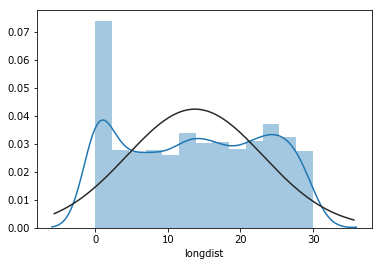

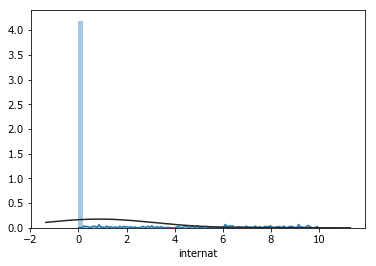

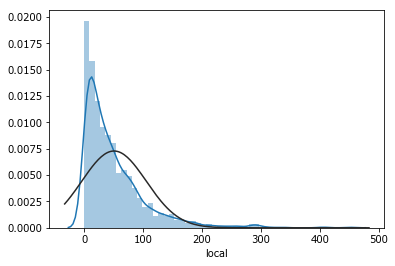

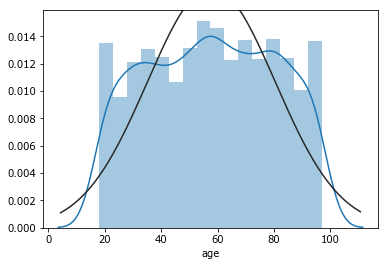

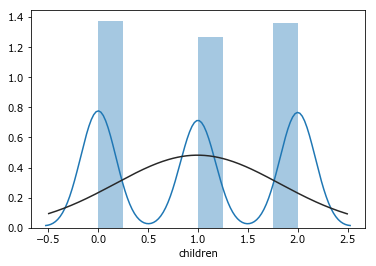

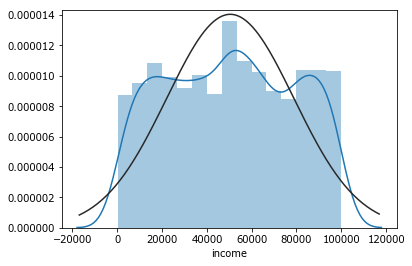

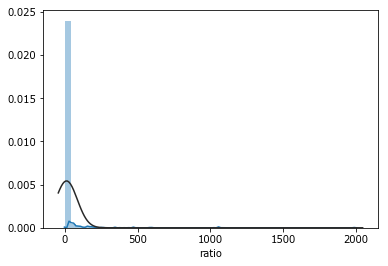

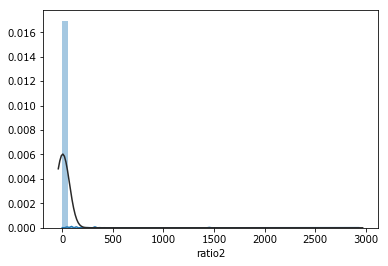

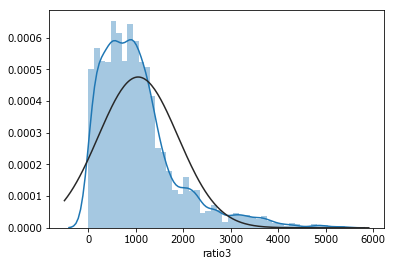

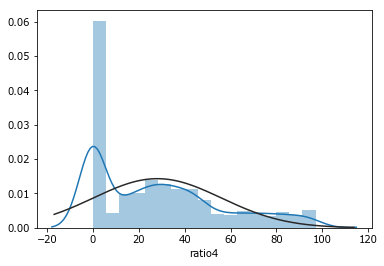

<Figure size 432x288 with 0 Axes>

In [23]:
# импортируем библиотеку seaborn, предварительно 
# установив ее в Anaconda Prompt с помощью команды
# conda install -c anaconda seaborn
import seaborn as sns

# импортируем norm и stats
from scipy import stats
from scipy.stats import norm

# строим гистограмму распределения 
# для количественных переменных
for i in numerical_columns:
    sns.distplot(train[i], fit=norm)
    fig = plt.figure()    

In [24]:
# подготавливаем данные перед преобразованием Бокса-Кокса
# (данные должны быть положительными)
train.replace({0: 0.5}, inplace=True)
test.replace({0: 0.5}, inplace=True)

In [25]:
# выполняем преобразование Бокса-Кокса
from scipy.stats import boxcox
for i in numerical_columns:  
    train[i], fitted_lambda = boxcox(train[i])     
    test[i] = boxcox(test[i], fitted_lambda)   

In [26]:
# выполняем стандартизацию количественных переменных
train_copy = train.copy()
for i in numerical_columns:    
    train[i] = (train[i] - train[i].mean()) / train[i].std()
    test[i] = (test[i] - train_copy[i].mean()) / train_copy[i].std()

In [27]:
# смотрим пропуски
print(train.isnull().sum())
print(test.isnull().sum())

longdist          0
internat          0
local             0
int_disc          0
billtype          0
pay               0
age               0
gender            0
marital           0
children          0
income            0
churn             0
gender_marital    0
ratio             0
ratio2            0
ratio3            0
ratio4            0
dtype: int64
longdist          0
internat          0
local             0
int_disc          0
billtype          0
pay               0
age               0
gender            0
marital           0
children          0
income            0
churn             0
gender_marital    0
ratio             0
ratio2            0
ratio3            0
ratio4            0
dtype: int64


In [28]:
# печатаем названия столбцов до и после
# дамми-кодирования
print("Исходные переменные:\n", list(train.columns), "\n")
train_dummies = pd.get_dummies(train)
print("Переменные после get_dummies:\n", list(train_dummies.columns))

print("Исходные переменные:\n", list(test.columns), "\n")
test_dummies = pd.get_dummies(test)
print("Переменные после get_dummies:\n", list(test_dummies.columns))

Исходные переменные:
 ['longdist', 'internat', 'local', 'int_disc', 'billtype', 'pay', 'age', 'gender', 'marital', 'children', 'income', 'churn', 'gender_marital', 'ratio', 'ratio2', 'ratio3', 'ratio4'] 

Переменные после get_dummies:
 ['longdist', 'internat', 'local', 'age', 'children', 'income', 'ratio', 'ratio2', 'ratio3', 'ratio4', 'int_disc_Да', 'int_disc_Нет', 'billtype_Бесплатный', 'billtype_Бюджетный', 'pay_Auto', 'pay_CC', 'pay_CH', 'gender_Женский', 'gender_Мужской', 'marital_Женат', 'marital_Одинокий', 'churn_Остается', 'churn_Уходит', 'gender_marital_Женский + Женат', 'gender_marital_Женский + Одинокий', 'gender_marital_Мужской + Женат', 'gender_marital_Мужской + Одинокий']
Исходные переменные:
 ['longdist', 'internat', 'local', 'int_disc', 'billtype', 'pay', 'age', 'gender', 'marital', 'children', 'income', 'churn', 'gender_marital', 'ratio', 'ratio2', 'ratio3', 'ratio4'] 

Переменные после get_dummies:
 ['longdist', 'internat', 'local', 'age', 'children', 'income', 'ratio

In [29]:
# создаем обучающий и контрольный массивы меток
y_train = train_dummies.loc[:, 'churn_Уходит']
y_test = test_dummies.loc[:, 'churn_Уходит']
# создаем обучающий и контрольный массивы признаков
train_dummies.drop(['churn_Остается', 'churn_Уходит'], axis=1, inplace=True)
test_dummies.drop(['churn_Остается', 'churn_Уходит'], axis=1, inplace=True)
X_train = train_dummies.loc[:, 'longdist':'gender_marital_Мужской + Одинокий']
X_test = test_dummies.loc[:, 'longdist':'gender_marital_Мужской + Одинокий']

## Построение модели логистической регрессии с помощью класса LogisticRegression

In [30]:
# импортируем класс LogisticRegression
from sklearn.linear_model import LogisticRegression
# создаем экземпляр класса LogisticRegression 
# (по сути задаем модель)
logreg = LogisticRegression(solver='lbfgs', max_iter=200).fit(X_train, y_train)
# печатаем значения правильности
print("Правильность на обучающей выборке: {:.3f}".format(
    logreg.score(X_train, y_train)))
print("Правильность на контрольной выборке: {:.3f}".format(
    logreg.score(X_test, y_test)))

Правильность на обучающей выборке: 0.812
Правильность на контрольной выборке: 0.809


In [31]:
# импортируем функцию roc_auc_score для вычисления AUC
from sklearn.metrics import roc_auc_score
# печатаем значения AUC
print("AUC на обучающей выборке: {:.3f}".format(
    roc_auc_score(y_train, logreg.predict_proba(X_train)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".format(
    roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])))

AUC на обучающей выборке: 0.885
AUC на контрольной выборке: 0.888


In [32]:
# пишем функцию, выполняющую биннинг
def user_bin(train, number):
    tv = 'churn'
    col_list = []  
    iv_list = []
    bins_list = [] 
    groups_list = []      
    a= 0.01  
    for var_name in train: 
        # используем для биннинга переменные с более чем 24 уникальными значениями 
        if(len(train[var_name].unique()) >= 24):
            col_list.append(var_name)  
    print('У нас ' + str(len(col_list)) + ' переменных, пригодных для биннинга')    
    for var_name in col_list:  
        num = number  
        bins = np.linspace(train[var_name].min(), train[var_name].max(), num) 
        rounded_bins = np.round(bins, 2)
        groups = np.digitize(train[var_name], bins)        
        biv = pd.crosstab(groups, train[tv])   
        # умножаем на 1.0, чтобы преобразовать во float и добавляем "a=0.01", 
        # чтобы избежать деления на ноль
        IV = sum(((1.0 * biv['Остается'] / sum(biv['Остается']) + a) - (
            1.0 * biv['Уходит'] / sum(biv['Уходит']) + a)) * np.log(
            (1.0 * biv['Остается'] / sum(biv['Остается']) + a) / (1.0 * biv['Уходит'] / sum(biv['Уходит']) + a)))
        iv_list.append(IV) 
        bins_list.append(num)        
        groups_list.append(rounded_bins)
    result = pd.DataFrame({'Переменная' : col_list, 
                           'Бины': groups_list, 
                           'IV': iv_list,
                           'Количество_бинов': bins_list})    
    return(result.sort_values(by='IV', ascending=False))

In [33]:
# увеличиваем ширину столбцов
pd.set_option('max_colwidth', 800)

In [34]:
# применяем функцию, разбивая каждую переменную,
# пригодную для биннинга, на 10 категорий
user_bin(train, 10)

У нас 9 переменных, пригодных для биннинга


,Переменная,Бины,IV,Количество_бинов
6,ratio2,"[-9.5, -8.18, -6.85, -5.52, -4.2, -2.87, -1.54, -0.21, 1.11, 2.44]",0.756717,10
0,longdist,"[-1.92, -1.55, -1.17, -0.8, -0.42, -0.05, 0.33, 0.7, 1.08, 1.45]",0.433322,10
1,internat,"[-15.23, -13.26, -11.29, -9.32, -7.35, -5.39, -3.42, -1.45, 0.52, 2.48]",0.375355,10
5,ratio,"[-2.33, -1.77, -1.21, -0.65, -0.09, 0.47, 1.03, 1.59, 2.14, 2.7]",0.308490,10
2,local,"[-2.87, -2.21, -1.54, -0.88, -0.22, 0.44, 1.1, 1.76, 2.42, 3.08]",0.230167,10
3,age,"[-1.86, -1.47, -1.08, -0.69, -0.3, 0.09, 0.48, 0.87, 1.26, 1.65]",0.119664,10
7,ratio3,"[-2.87, -2.22, -1.56, -0.91, -0.25, 0.4, 1.06, 1.71, 2.37, 3.02]",0.067524,10
8,ratio4,"[-1.3, -0.99, -0.68, -0.38, -0.07, 0.24, 0.54, 0.85, 1.16, 1.46]",0.033225,10
4,income,"[-2.19, -1.78, -1.36, -0.94, -0.52, -0.1, 0.32, 0.74, 1.16, 1.58]",0.021932,10


In [35]:
# создадим бины для переменной longdist
bins = [-np.inf, -1.55, -1.17, -0.8, -0.42, -0.05, 0.33, 0.7, 1.08, np.inf]
# выполняем биннинг переменной longdist
train['longdistcat'] = pd.cut(train['longdist'], bins).astype('object')
test['longdistcat'] = pd.cut(test['longdist'], bins).astype('object')

In [36]:
# создадим бины для переменной age
bins = [-np.inf, -1.47, -1.08, -0.69, -0.3, 0.09, 0.48, 0.87, 1.26, np.inf]
# выполняем биннинг переменной age
train['agecat'] = pd.cut(train['age'], bins).astype('object')
test['agecat'] = pd.cut(test['age'], bins).astype('object')

In [37]:
# напишем функцию для создания взаимодействия между 
# исходными категориальными признаки и переменными, 
# полученными в результате биннинга
def make_conj2(df, feature1, feature2):
    df[feature1 + "_" + feature2] = df[feature1].astype('str') + " + " + df[feature2].astype('str')

In [38]:
# применяем написанную функцию
make_conj2(train, 'gender', 'agecat')
make_conj2(train, 'gender', 'longdistcat')

make_conj2(test, 'gender', 'agecat')
make_conj2(test, 'gender', 'longdistcat')

In [39]:
# проверяем, совпадает ли количество категорий каждой переменной 
# в обучающей и контрольной выборке
interactions_features = ['gender_longdistcat', 'gender_agecat']
for i in interactions_features:
    print(train[i].nunique() == test[i].nunique())

True
True


In [40]:
# печатаем названия столбцов до и после дамми-кодирования
print("Исходные переменные:\n", list(train.columns), "\n")
train_dum = pd.get_dummies(train)
print("Переменные после get_dummies:\n", list(train_dum.columns))

print("Исходные переменные:\n", list(test.columns), "\n")
test_dum = pd.get_dummies(test)
print("Переменные после get_dummies:\n", list(test_dum.columns))

Исходные переменные:
 ['longdist', 'internat', 'local', 'int_disc', 'billtype', 'pay', 'age', 'gender', 'marital', 'children', 'income', 'churn', 'gender_marital', 'ratio', 'ratio2', 'ratio3', 'ratio4', 'longdistcat', 'agecat', 'gender_agecat', 'gender_longdistcat'] 

Переменные после get_dummies:
 ['longdist', 'internat', 'local', 'age', 'children', 'income', 'ratio', 'ratio2', 'ratio3', 'ratio4', 'int_disc_Да', 'int_disc_Нет', 'billtype_Бесплатный', 'billtype_Бюджетный', 'pay_Auto', 'pay_CC', 'pay_CH', 'gender_Женский', 'gender_Мужской', 'marital_Женат', 'marital_Одинокий', 'churn_Остается', 'churn_Уходит', 'gender_marital_Женский + Женат', 'gender_marital_Женский + Одинокий', 'gender_marital_Мужской + Женат', 'gender_marital_Мужской + Одинокий', 'longdistcat_(-inf, -1.55]', 'longdistcat_(-1.55, -1.17]', 'longdistcat_(-1.17, -0.8]', 'longdistcat_(-0.8, -0.42]', 'longdistcat_(-0.42, -0.05]', 'longdistcat_(-0.05, 0.33]', 'longdistcat_(0.33, 0.7]', 'longdistcat_(0.7, 1.08]', 'longdistca

In [41]:
# создаем обучающий и контрольный массивы признаков
train_dum.drop(['churn_Остается', 'churn_Уходит'], axis=1, inplace=True)
test_dum.drop(['churn_Остается', 'churn_Уходит'], axis=1, inplace=True)
X_train2 = train_dum.loc[:, 'longdist':'gender_longdistcat_Мужской + (1.08, inf]']
X_test2 = test_dum.loc[:, 'longdist':'gender_longdistcat_Мужской + (1.08, inf]']

In [42]:
# строим логистическую регрессию
logreg2 = LogisticRegression(solver='lbfgs', max_iter=200).fit(X_train2, y_train)
# печатаем значения AUC
print("AUC на обучающей выборке: {:.3f}".
      format(roc_auc_score(y_train, logreg2.predict_proba(X_train2)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".
      format(roc_auc_score(y_test, logreg2.predict_proba(X_test2)[:, 1])))

AUC на обучающей выборке: 0.923
AUC на контрольной выборке: 0.916


In [43]:
# взглянем на коэффициенты логистической регрессии,
# запишем коэффициенты и названия предикторов
# в отдельные объекты
coef = logreg2.coef_
feat_labels = X_train2.columns

In [44]:
# вычислим свободный член (константу)
intercept = logreg2.intercept_
intercept

array([-0.52091247])

In [45]:
# переводим массив в скаляр
intercept = round(np.asscalar(intercept), 2)
intercept

-0.52

In [46]:
# печатаем название "Константа"    
print("Константа:", intercept)
# печатаем название "Коэффициенты"
print("Коэффициенты:")
# для удобства сопоставим каждому названию 
# предиктора соответствующий коэффициент
for c, feature in zip(coef[0], feat_labels):
    print(feature, round(c, 2))

Константа: -0.52
Коэффициенты:
longdist -0.16
internat 1.36
local 0.02
age -0.73
children -0.25
income 0.61
ratio -0.62
ratio2 0.26
ratio3 -1.11
ratio4 0.27
int_disc_Да 0.01
int_disc_Нет -0.01
billtype_Бесплатный 0.03
billtype_Бюджетный -0.03
pay_Auto -0.18
pay_CC 0.07
pay_CH 0.12
gender_Женский 1.05
gender_Мужской -1.05
marital_Женат -0.02
marital_Одинокий 0.02
gender_marital_Женский + Женат 0.4
gender_marital_Женский + Одинокий 0.27
gender_marital_Мужской + Женат -0.42
gender_marital_Мужской + Одинокий -0.25
longdistcat_(-inf, -1.55] 1.36
longdistcat_(-1.55, -1.17] 0.26
longdistcat_(-1.17, -0.8] 0.08
longdistcat_(-0.8, -0.42] 0.16
longdistcat_(-0.42, -0.05] -0.04
longdistcat_(-0.05, 0.33] -0.5
longdistcat_(0.33, 0.7] -0.54
longdistcat_(0.7, 1.08] -0.29
longdistcat_(1.08, inf] -0.49
agecat_(-inf, -1.47] 0.05
agecat_(-1.47, -1.08] -0.5
agecat_(-1.08, -0.69] -1.05
agecat_(-0.69, -0.3] 0.22
agecat_(-0.3, 0.09] 0.07
agecat_(0.09, 0.48] 0.11
agecat_(0.48, 0.87] 0.17
agecat_(0.87, 1.26] 0.3

In [47]:
# вычислим экспоненциальные коэффициенты
# и запишем их в отдельный объект
exp_coef = np.round(np.exp(coef), 3)

# печатаем название "Константа"    
print("Константа:", intercept)
# печатаем название "Экспоненциальные коэффициенты"
print("Экспоненциальные коэффициенты:")
# для удобства сопоставим каждому названию 
# предиктора соответствующий коэффициент
for c, feature in zip(exp_coef[0], feat_labels):
    print(feature, c)

Константа: -0.52
Экспоненциальные коэффициенты:
longdist 0.855
internat 3.902
local 1.022
age 0.481
children 0.779
income 1.849
ratio 0.537
ratio2 1.297
ratio3 0.328
ratio4 1.307
int_disc_Да 1.008
int_disc_Нет 0.992
billtype_Бесплатный 1.031
billtype_Бюджетный 0.97
pay_Auto 0.831
pay_CC 1.068
pay_CH 1.127
gender_Женский 2.861
gender_Мужской 0.35
marital_Женат 0.979
marital_Одинокий 1.022
gender_marital_Женский + Женат 1.492
gender_marital_Женский + Одинокий 1.312
gender_marital_Мужской + Женат 0.656
gender_marital_Мужской + Одинокий 0.779
longdistcat_(-inf, -1.55] 3.898
longdistcat_(-1.55, -1.17] 1.292
longdistcat_(-1.17, -0.8] 1.081
longdistcat_(-0.8, -0.42] 1.169
longdistcat_(-0.42, -0.05] 0.963
longdistcat_(-0.05, 0.33] 0.606
longdistcat_(0.33, 0.7] 0.583
longdistcat_(0.7, 1.08] 0.751
longdistcat_(1.08, inf] 0.616
agecat_(-inf, -1.47] 1.049
agecat_(-1.47, -1.08] 0.604
agecat_(-1.08, -0.69] 0.351
agecat_(-0.69, -0.3] 1.246
agecat_(-0.3, 0.09] 1.078
agecat_(0.09, 0.48] 1.112
agecat_(0

## Настройка гиперпараметров логистической регрессии с помощью класса GridSearchCV

In [48]:
# импортируем класс StratifiedKFold
from sklearn.model_selection import StratifiedKFold
# создаем экземпляр класса StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# импортируем класс GridSearchCV
from sklearn.model_selection import GridSearchCV
# создаем экземпляр класса LogisticRegression,
# логистическую регрессию с L1-регуляризацией
logreg_grid = LogisticRegression(solver='lbfgs', max_iter=200, penalty='l2')
# задаем сетку гиперпараметров, будем перебирать 
# разные значения штрафа
param_grid_logreg = {'C': [0.2, 0.4, 0.6, 0.8, 1]}
# создаем экземпляр класса GridSearchCV
grid_search = GridSearchCV(logreg_grid, param_grid_logreg, 
                           scoring='roc_auc', 
                           n_jobs=-1, cv=skf)
# запускаем решетчатый поиск
grid_search.fit(X_train2, y_train)
# проверяем модель со значением гиперпараметра C, дающим наибольшее
# значение AUC (усредненное по контрольным блокам перекрестной
# проверки), на тестовой выборке
test_score = roc_auc_score(y_test, grid_search.predict_proba(X_test2)[:, 1])
# смотрим результаты решетчатого поиска
print("AUC на тестовой выборке: {:.3f}".format(test_score))
print("Наилучшее значение гиперпараметра C: {}".format(grid_search.best_params_))
print("Наилучшее значение AUC: {:.3f}".format(grid_search.best_score_))

AUC на тестовой выборке: 0.916
Наилучшее значение гиперпараметра C: {'C': 0.8}
Наилучшее значение AUC: 0.916


## Построение модели логистической регрессии с помощью класса H2OGeneralizedLinearEstimator библиотеки H2O

In [49]:
# перед импортом библиотеки h2o и модуля os убедитесь, что библиотека h2o установлена 
# (сначала установите Java SE Development Kit 8, обратите внимание, 
# 9-я версия H2O не поддерживается, а затем после установки Java 
# запустите Anaconda Prompt и установите h2o с помощью 
# строки pip install h2o)
import h2o
import os
h2o.init(nthreads = -1, max_mem_size = 8)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,17 days 15 hours 46 mins
H2O cluster timezone:,Europe/Moscow
H2O data parsing timezone:,UTC
H2O cluster version:,3.20.0.5
H2O cluster version age:,2 months and 20 days
H2O cluster name:,H2O_from_python_artemgruzdev_lulymm
H2O cluster total nodes:,1
H2O cluster free memory:,1.536 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,12
H2O cluster status:,"locked, healthy"


In [50]:
# импортируем библиотеку для транслитерации
from transliterate import translit

In [51]:
# сейчас нам надо задать переменные для транслитерации
cat_cols = ['int_disc', 'billtype', 'pay', 'gender', 
            'marital', 'gender_marital', 'gender_agecat',
            'gender_longdistcat', 'churn']

In [52]:
# выполняем транслитерацию
for i in cat_cols:
    train[i] = train[i].apply(lambda x: translit(x, 'ru', reversed=True))
    test[i] = test[i].apply(lambda x: translit(x, 'ru', reversed=True))

In [53]:
# смотрим результаты транслитерации
# на обучающем наборе
for c in cat_cols:
    print(train[c].unique())

['Net' 'Da']
['Besplatnyj' 'Bjudzhetnyj']
['CC' 'Auto' 'CH']
['Zhenskij' 'Muzhskoj']
['Odinokij' 'Zhenat']
['Zhenskij + Odinokij' 'Muzhskoj + Odinokij' 'Muzhskoj + Zhenat'
 'Zhenskij + Zhenat']
['Zhenskij + (0.09, 0.48]' 'Muzhskoj + (-1.08, -0.69]'
 'Muzhskoj + (0.48, 0.87]' 'Muzhskoj + (1.26, inf]'
 'Zhenskij + (-0.3, 0.09]' 'Zhenskij + (0.87, 1.26]'
 'Muzhskoj + (0.09, 0.48]' 'Muzhskoj + (0.87, 1.26]'
 'Zhenskij + (-inf, -1.47]' 'Zhenskij + (1.26, inf]'
 'Zhenskij + (-0.69, -0.3]' 'Muzhskoj + (-0.3, 0.09]'
 'Zhenskij + (-1.47, -1.08]' 'Zhenskij + (-1.08, -0.69]'
 'Muzhskoj + (-inf, -1.47]' 'Muzhskoj + (-0.69, -0.3]'
 'Muzhskoj + (-1.47, -1.08]' 'Zhenskij + (0.48, 0.87]']
['Zhenskij + (1.08, inf]' 'Muzhskoj + (0.7, 1.08]'
 'Muzhskoj + (-0.42, -0.05]' 'Muzhskoj + (-0.05, 0.33]'
 'Zhenskij + (-0.05, 0.33]' 'Muzhskoj + (0.33, 0.7]'
 'Muzhskoj + (1.08, inf]' 'Zhenskij + (-1.55, -1.17]'
 'Zhenskij + (0.7, 1.08]' 'Zhenskij + (-0.42, -0.05]'
 'Zhenskij + (-inf, -1.55]' 'Muzhskoj + (-0.8, -0.

In [54]:
# преобразовываем датафреймы pandas во фреймы h2o -
# специальную структуру данных, используемую h2o
tr = h2o.H2OFrame(train)
valid = h2o.H2OFrame(test)

/anaconda3/lib/python3.6/site-packages/h2o/utils/shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [55]:
# взглянем на обучающий фрейм, обратите внимание,
# сейчас метод .describe() - это метод h2o, а не 
# pandas
tr.describe()

Rows:3102
Cols:21




,longdist,internat,local,int_disc,billtype,pay,age,gender,marital,children,income,churn,gender_marital,ratio,ratio2,ratio3,ratio4,longdistcat,agecat,gender_agecat,gender_longdistcat
type,real,real,real,enum,enum,enum,real,enum,enum,real,real,enum,enum,real,real,real,real,enum,enum,enum,enum
mins,-1.922190332680999,-15.225584821239664,-2.86736862186136,,,,-1.857935792107858,,,-1.2055901603877592,-2.1943787395166923,,,-2.330211514783041,-9.503757336578326,-2.8712644967869405,-1.2951323273034068,,,,
mean,4.764485789406081e-15,-1.4680639516539973e-14,-5.277841965550811e-15,,,,-1.857631344755195e-14,,,2.3155339679090808e-17,-1.5874888209532756e-15,,,1.9446317928335788e-15,-3.1604764378495576e-15,-6.282301068250007e-15,-1.1884807374351603e-14,,,,
maxs,1.4501470882699774,2.483832795794384,3.0834536989851222,,,,1.648840491931166,,,1.2132902009038464,1.5759653200489987,,,2.70427302500694,2.439657162530019,3.0236172820101896,1.4621879312123467,,,,
sigma,0.9999999999999958,0.9999999999999815,0.9999999999999996,,,,1.000000000000002,,,1.0000000000000215,0.9999999999999988,,,1.000000000000003,1.0000000000000036,0.9999999999999988,1.0000000000000113,,,,
zeros,0,0,0,,,,0,,,0,0,,,0,0,0,0,,,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1.357279723086889,-0.31585252930053226,-0.9017362984866898,Net,Besplatnyj,CC,0.09320585387491429,Zhenskij,Odinokij,0.008938915461478285,0.4393342675603697,Uhodit,Zhenskij + Odinokij,-0.5203384658210319,-0.48515790022525257,0.2437280515263108,1.0227513500028145,"(1.08, inf]","(0.09, 0.48]","Zhenskij + (0.09, 0.48]","Zhenskij + (1.08, inf]"
1,1.0318685854500342,-0.31585252930053226,0.18308971785480688,Net,Bjudzhetnyj,Auto,-0.851212848538122,Muzhskoj,Odinokij,1.2132902009038464,0.3400856557520996,Ostaetsja,Muzhskoj + Odinokij,-0.8720242358007543,-0.48515790022525257,0.7609595981087381,0.20302996657087277,"(0.7, 1.08]","(-1.08, -0.69]","Muzhskoj + (-1.08, -0.69]","Muzhskoj + (0.7, 1.08]"
2,-0.24673977478227935,1.6363023478860177,1.641613953303693,Net,Bjudzhetnyj,CC,0.6431016783477357,Muzhskoj,Odinokij,1.2132902009038464,0.24201034604138735,Uhodit,Muzhskoj + Odinokij,0.7726309131160609,1.4636623242633613,-0.11689676395497288,0.6368002657761567,"(-0.42, -0.05]","(0.48, 0.87]","Muzhskoj + (0.48, 0.87]","Muzhskoj + (-0.42, -0.05]"


In [56]:
# задаем название зависимой переменной
dependent = 'churn'
# задаем список названий предикторов
predictors = list(tr.columns)
# удаляем название зависимой переменной из 
# списка названий предикторов
predictors.remove(dependent)

In [57]:
# импортируем класс H2OGeneralizedLinearEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

In [58]:
# создаем экземпляр класса H2OGeneralizedLinearEstimator
glm_model = H2OGeneralizedLinearEstimator(family='binomial')
# обучаем модель
glm_model.train(predictors, dependent, 
                training_frame=tr, validation_frame=valid)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [59]:
# смотрим модель
glm_model

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1539287789601_6798


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.10749417254805312
RMSE: 0.3278630393137554
LogLoss: 0.33947130272190795
Null degrees of freedom: 3101
Residual degrees of freedom: 3044
Null deviance: 4249.593703095778
Residual deviance: 2106.0799620867174
AIC: 2222.0799620867174
AUC: 0.9223266425709634
Gini: 0.8446532851419268
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3736549050523264: 


,Ostaetsja,Uhodit,Error,Rate
Ostaetsja,1398.0,351.0,0.2007,(351.0/1749.0)
Uhodit,88.0,1265.0,0.065,(88.0/1353.0)
Total,1486.0,1616.0,0.1415,(439.0/3102.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3736549,0.8521388,245.0
max f2,0.1780259,0.9151139,298.0
max f0point5,0.5221039,0.8160888,208.0
max accuracy,0.3765009,0.8584784,244.0
max precision,0.9977016,1.0,0.0
max recall,0.0748585,1.0,341.0
max specificity,0.9977016,1.0,0.0
max absolute_mcc,0.3736549,0.7289058,245.0
max min_per_class_accuracy,0.5730375,0.8399085,194.0
max mean_per_class_accuracy,0.3736549,0.8671366,245.0


Gains/Lift Table: Avg response rate: 43,62 %, avg score: 43,62 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0106383,0.9962979,2.2926829,2.2926829,1.0,0.9970460,1.0,0.9970460,0.0243902,0.0243902,129.2682927,129.2682927
,2,0.0209542,0.9949091,2.2926829,2.2926829,1.0,0.9955623,1.0,0.9963155,0.0236511,0.0480414,129.2682927,129.2682927
,3,0.0303030,0.9934588,2.2926829,2.2926829,1.0,0.9940904,1.0,0.9956291,0.0214339,0.0694752,129.2682927,129.2682927
,4,0.0406190,0.9921038,2.2926829,2.2926829,1.0,0.9926280,1.0,0.9948669,0.0236511,0.0931264,129.2682927,129.2682927
,5,0.0509349,0.9911898,2.2926829,2.2926829,1.0,0.9916585,1.0,0.9942171,0.0236511,0.1167775,129.2682927,129.2682927
,6,0.1005803,0.9669700,2.0544821,2.1751094,0.8961039,0.9836233,0.9487179,0.9889881,0.1019956,0.2187731,105.4482103,117.5109443
,7,0.1508704,0.8847087,1.9987492,2.1163227,0.8717949,0.9220959,0.9230769,0.9666907,0.1005174,0.3192905,99.8749218,111.6322702
,8,0.2001934,0.8387896,1.9630161,2.0785515,0.8562092,0.8582290,0.9066023,0.9399683,0.0968219,0.4161123,96.3016101,107.8551510
,9,0.3004513,0.7204104,1.7250412,1.9605883,0.7524116,0.7747395,0.8551502,0.8848329,0.1729490,0.5890613,72.5041173,96.0588297
,10,0.4003868,0.6325981,1.7010228,1.8958014,0.7419355,0.6775664,0.8268921,0.8330997,0.1699926,0.7590540,70.1022817,89.5801422




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.11098403705572513
RMSE: 0.3331426677201903
LogLoss: 0.3553257314301664
Null degrees of freedom: 1328
Residual degrees of freedom: 1271
Null deviance: 1821.8635267830318
Residual deviance: 944.4557941413822
AIC: 1060.4557941413823
AUC: 0.9154935894781877
Gini: 0.8309871789563754
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.39330059276785917: 


,Ostaetsja,Uhodit,Error,Rate
Ostaetsja,592.0,155.0,0.2075,(155.0/747.0)
Uhodit,38.0,544.0,0.0653,(38.0/582.0)
Total,630.0,699.0,0.1452,(193.0/1329.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3933006,0.8493365,237.0
max f2,0.1369709,0.9148265,304.0
max f0point5,0.6167189,0.8183391,180.0
max accuracy,0.4762982,0.8562829,224.0
max precision,0.9978491,1.0,0.0
max recall,0.0986591,1.0,323.0
max specificity,0.9978491,1.0,0.0
max absolute_mcc,0.3933006,0.7225593,237.0
max min_per_class_accuracy,0.5960964,0.8433735,189.0
max mean_per_class_accuracy,0.3933006,0.8636056,237.0


Gains/Lift Table: Avg response rate: 43,79 %, avg score: 44,71 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0112867,0.9962535,2.2835052,2.2835052,1.0,0.9968934,1.0,0.9968934,0.0257732,0.0257732,128.3505155,128.3505155
,2,0.0210685,0.9955586,2.2835052,2.2835052,1.0,0.9958713,1.0,0.9964188,0.0223368,0.0481100,128.3505155,128.3505155
,3,0.0300978,0.9939877,2.2835052,2.2835052,1.0,0.9946675,1.0,0.9958934,0.0206186,0.0687285,128.3505155,128.3505155
,4,0.0406321,0.9929622,2.2835052,2.2835052,1.0,0.9933640,1.0,0.9952377,0.0240550,0.0927835,128.3505155,128.3505155
,5,0.0504138,0.9918985,2.2835052,2.2835052,1.0,0.9923063,1.0,0.9946689,0.0223368,0.1151203,128.3505155,128.3505155
,6,0.1000752,0.9756800,1.9375195,2.1118130,0.8484848,0.9873763,0.9248120,0.9910500,0.0962199,0.2113402,93.7519525,111.1813038
,7,0.1504891,0.8946855,2.0449300,2.0894072,0.8955224,0.9406488,0.915,0.9741656,0.1030928,0.3144330,104.4929989,108.9407216
,8,0.2001505,0.8353048,1.7991253,2.0173824,0.7878788,0.8642857,0.8834586,0.9469022,0.0893471,0.4037801,79.9125273,101.7382373
,9,0.3002257,0.7275967,1.6139059,1.8828902,0.7067669,0.7755331,0.8245614,0.8897791,0.1615120,0.5652921,61.3905899,88.2890215
,10,0.4010534,0.6433196,1.8745192,1.8807857,0.8208955,0.6853388,0.8236398,0.8383814,0.1890034,0.7542955,87.4519157,88.0785671



Scoring History: 


,timestamp,duration,iterations,negative_log_likelihood,objective
,2018-10-29 14:42:33,0.000 sec,0,2124.7968515,0.6849764
,2018-10-29 14:42:33,0.005 sec,1,1214.4118957,0.3949398
,2018-10-29 14:42:33,0.007 sec,2,1080.8989291,0.3538890
,2018-10-29 14:42:33,0.009 sec,3,1055.3249154,0.3469498
,2018-10-29 14:42:33,0.010 sec,4,1052.5796708,0.3465192
,2018-10-29 14:42:33,0.012 sec,5,1053.0399810,0.3465732


In [60]:
# записываем таблицу коэффициентов
coeff_table = glm_model._model_json['output']['coefficients_table']

# преобразуем таблицу коэффициентов в датафрейм pondas
coeff_table.as_data_frame()

,names,coefficients,standardized_coefficients
0,Intercept,-0.462783,-0.462783
1,"gender_agecat.Muzhskoj + (-0.3, 0.09]",-0.309550,-0.309550
2,"gender_agecat.Muzhskoj + (-0.69, -0.3]",-0.908882,-0.908882
3,"gender_agecat.Muzhskoj + (-1.08, -0.69]",0.000000,0.000000
4,"gender_agecat.Muzhskoj + (-1.47, -1.08]",1.258076,1.258076
5,"gender_agecat.Muzhskoj + (-inf, -1.47]",1.336043,1.336043
6,"gender_agecat.Muzhskoj + (0.09, 0.48]",-0.707678,-0.707678
7,"gender_agecat.Muzhskoj + (0.48, 0.87]",-0.558214,-0.558214
8,"gender_agecat.Muzhskoj + (0.87, 1.26]",-0.415423,-0.415423
9,"gender_agecat.Muzhskoj + (1.26, inf]",0.000000,0.000000


In [61]:
# еще можно добавлять взаимодействия признаков

# создаем экземпляр класса H2OGeneralizedLinearEstimator
glm_model2 = H2OGeneralizedLinearEstimator(family="binomial", 
                                           interactions=['longdistcat', 'marital'])
# обучаем модель
glm_model2.train(predictors, dependent, training_frame=tr, 
                validation_frame=valid)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [62]:
# смотрим модель
glm_model2

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1539287789601_6801


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.10704499135049003
RMSE: 0.3271773087341022
LogLoss: 0.3378125494796435
Null degrees of freedom: 3101
Residual degrees of freedom: 3035
Null deviance: 4249.593703095778
Residual deviance: 2095.7890569717083
AIC: 2229.7890569717083
AUC: 0.9231001814150372
Gini: 0.8462003628300745
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3525581301084384: 


,Ostaetsja,Uhodit,Error,Rate
Ostaetsja,1393.0,356.0,0.2035,(356.0/1749.0)
Uhodit,81.0,1272.0,0.0599,(81.0/1353.0)
Total,1474.0,1628.0,0.1409,(437.0/3102.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3525581,0.8534049,247.0
max f2,0.1803031,0.9154930,294.0
max f0point5,0.6130078,0.8153587,173.0
max accuracy,0.3525581,0.8591231,247.0
max precision,0.9978754,1.0,0.0
max recall,0.0692170,1.0,343.0
max specificity,0.9978754,1.0,0.0
max absolute_mcc,0.3525581,0.7314634,247.0
max min_per_class_accuracy,0.5609395,0.8399085,194.0
max mean_per_class_accuracy,0.3525581,0.8682941,247.0


Gains/Lift Table: Avg response rate: 43,62 %, avg score: 43,62 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0103159,0.9965086,2.2926829,2.2926829,1.0,0.9973331,1.0,0.9973331,0.0236511,0.0236511,129.2682927,129.2682927
,2,0.0203095,0.9954122,2.2926829,2.2926829,1.0,0.9958961,1.0,0.9966260,0.0229120,0.0465632,129.2682927,129.2682927
,3,0.0303030,0.9937897,2.2926829,2.2926829,1.0,0.9943104,1.0,0.9958624,0.0229120,0.0694752,129.2682927,129.2682927
,4,0.0406190,0.9929405,2.2926829,2.2926829,1.0,0.9933200,1.0,0.9952167,0.0236511,0.0931264,129.2682927,129.2682927
,5,0.0506125,0.9909885,2.2926829,2.2926829,1.0,0.9920370,1.0,0.9945889,0.0229120,0.1160384,129.2682927,129.2682927
,6,0.1002579,0.9682785,2.1289199,2.2115912,0.9285714,0.9833880,0.9646302,0.9890425,0.1056911,0.2217295,112.8919861,121.1591248
,7,0.1502257,0.8858696,1.9524784,2.1254056,0.8516129,0.9231974,0.9270386,0.9671412,0.0975610,0.3192905,95.2478363,112.5405632
,8,0.2005158,0.8367992,1.8958724,2.0678378,0.8269231,0.8614114,0.9019293,0.9406237,0.0953437,0.4146341,89.5872420,106.7837817
,9,0.3001289,0.7267803,1.7584655,1.9651568,0.7669903,0.7781468,0.8571429,0.8866975,0.1751663,0.5898004,75.8465546,96.5156794
,10,0.4000645,0.6334913,1.6788356,1.8936342,0.7322581,0.6799553,0.8259468,0.8350536,0.1677753,0.7575758,67.8835563,89.3634166




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.11129009629688912
RMSE: 0.33360170307852016
LogLoss: 0.3558792893448026
Null degrees of freedom: 1328
Residual degrees of freedom: 1262
Null deviance: 1821.8635267830318
Residual deviance: 945.9271510784855
AIC: 1079.9271510784856
AUC: 0.9148828992947735
Gini: 0.829765798589547
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.41293382749306595: 


,Ostaetsja,Uhodit,Error,Rate
Ostaetsja,596.0,151.0,0.2021,(151.0/747.0)
Uhodit,40.0,542.0,0.0687,(40.0/582.0)
Total,636.0,693.0,0.1437,(191.0/1329.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4129338,0.8501961,235.0
max f2,0.1801170,0.9137380,290.0
max f0point5,0.4808725,0.8124618,226.0
max accuracy,0.4808725,0.8562829,226.0
max precision,0.9980667,1.0,0.0
max recall,0.0975079,1.0,326.0
max specificity,0.9980667,1.0,0.0
max absolute_mcc,0.4129338,0.7241547,235.0
max min_per_class_accuracy,0.5892494,0.8393574,193.0
max mean_per_class_accuracy,0.4129338,0.8645648,235.0


Gains/Lift Table: Avg response rate: 43,79 %, avg score: 44,73 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0105342,0.9964741,2.2835052,2.2835052,1.0,0.9972657,1.0,0.9972657,0.0240550,0.0240550,128.3505155,128.3505155
,2,0.0203160,0.9955465,2.2835052,2.2835052,1.0,0.9960234,1.0,0.9966675,0.0223368,0.0463918,128.3505155,128.3505155
,3,0.0300978,0.9945378,2.2835052,2.2835052,1.0,0.9949952,1.0,0.9961240,0.0223368,0.0687285,128.3505155,128.3505155
,4,0.0406321,0.9936466,2.2835052,2.2835052,1.0,0.9940708,1.0,0.9955917,0.0240550,0.0927835,128.3505155,128.3505155
,5,0.0511663,0.9922758,2.2835052,2.2835052,1.0,0.9927857,1.0,0.9950140,0.0240550,0.1168385,128.3505155,128.3505155
,6,0.1000752,0.9752203,1.9321967,2.1118130,0.8461538,0.9873743,0.9248120,0.9912803,0.0945017,0.2113402,93.2196669,111.1813038
,7,0.1504891,0.8978942,1.9426835,2.0551546,0.8507463,0.9428028,0.9,0.9750404,0.0979381,0.3092784,94.2683490,105.5154639
,8,0.2001505,0.8335571,1.8337238,2.0002132,0.8030303,0.8677931,0.8759398,0.9484301,0.0910653,0.4003436,83.3723836,100.0213162
,9,0.3002257,0.7301849,1.6825827,1.8943364,0.7368421,0.7792999,0.8295739,0.8920534,0.1683849,0.5687285,68.2582746,89.4336356
,10,0.4003010,0.6437026,1.8027672,1.8714441,0.7894737,0.6905116,0.8195489,0.8416679,0.1804124,0.7491409,80.2767227,87.1444074



Scoring History: 


,timestamp,duration,iterations,negative_log_likelihood,objective
,2018-10-29 14:42:34,0.000 sec,0,2124.7968515,0.6849764
,2018-10-29 14:42:34,0.003 sec,1,1212.0441982,0.3942688
,2018-10-29 14:42:34,0.005 sec,2,1077.3753782,0.3529044
,2018-10-29 14:42:34,0.007 sec,3,1051.4419514,0.3458878
,2018-10-29 14:42:34,0.011 sec,4,1048.3553019,0.3454060
,2018-10-29 14:42:34,0.013 sec,5,1048.4352902,0.3454126
,2018-10-29 14:42:34,0.017 sec,6,1047.8876837,0.3453080
,2018-10-29 14:42:34,0.019 sec,7,1047.8945285,0.3453083


In [63]:
# чтобы вычислить p-значения коэффициентов, нужно 
# задать параметр compute_p_values, отключить 
# регуляризацию (lambda_ = 0), задать метод наименьших 
# квадратов с итеративным пересчётом весов (solver='IRLSM'),
# рекомендуется задать параметр remove_collinear_columns

# создаем экземпляр класса H2OGeneralizedLinearEstimator
glm_model3 = H2OGeneralizedLinearEstimator(lambda_=0, family='binomial', solver='IRLSM',
                                           remove_collinear_columns=True,
                                           compute_p_values=True)
# обучаем модель
glm_model3.train(predictors, dependent, 
                 training_frame=tr, validation_frame=valid)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [64]:
# записываем таблицу коэффициентов
coeff_table = glm_model3._model_json['output']['coefficients_table']

# преобразуем таблицу коэффициентов в датафрейм pondas
coeff_table.as_data_frame()

,names,coefficients,std_error,z_value,p_value,standardized_coefficients
0,Intercept,-3.461694,0.471562,-7.340908,2.121636e-13,-3.461694
1,"gender_agecat.Muzhskoj + (-0.69, -0.3]",-1.174961,0.500995,-2.345253,1.901419e-02,-1.174961
2,"gender_agecat.Muzhskoj + (-1.08, -0.69]",-1.385593,0.618926,-2.238704,2.517521e-02,-1.385593
3,"gender_agecat.Muzhskoj + (-1.47, -1.08]",0.206461,0.705141,0.292794,7.696795e-01,0.206461
4,"gender_agecat.Muzhskoj + (-inf, -1.47]",0.119392,0.896179,0.133224,8.940164e-01,0.119392
5,"gender_agecat.Muzhskoj + (0.09, 0.48]",-0.050417,0.443004,-0.113806,9.093913e-01,-0.050417
6,"gender_agecat.Muzhskoj + (0.48, 0.87]",0.510518,0.550316,0.927681,3.535731e-01,0.510518
7,"gender_agecat.Muzhskoj + (0.87, 1.26]",1.101026,0.720962,1.527163,1.267205e-01,1.101026
8,"gender_agecat.Muzhskoj + (1.26, inf]",2.349351,0.896270,2.621252,8.760752e-03,2.349351
9,"gender_agecat.Zhenskij + (-0.3, 0.09]",9.888221,64.436613,0.153457,8.780382e-01,9.888221


In [65]:
# импортируем класс H2OGridSearch для выполнения решетчатого поиска
from h2o.grid.grid_search import H2OGridSearch

# задаем сетку параметров, будем перебирать разные значения alpha,
# alpha определяет тип регуляризации: значение 1 соответствует 
# l1-регуляризации (лассо), значение 0 соответствует l2-регуляризации 
# (гребневой регрессии), промежуточное значение соответствует 
# комбинации штрафов l1 и l2 (эластичной сети)
hyper_parameters = {'alpha':[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}

# создаем экземпляр класса H2OGridSearch, lambda_search 
# задает перебор значений lambda - силы регуляризации
gridsearch = H2OGridSearch(H2OGeneralizedLinearEstimator(family='binomial', lambda_search=True),
                           grid_id='grid_01', hyper_params=hyper_parameters)
# подгоняем модели решетчатого поиска
gridsearch.train(predictors, dependent, 
                 training_frame=tr, 
                 nfolds=5, 
                 keep_cross_validation_predictions=True, 
                 seed=1000000)

glm Grid Build progress: |████████████████████████████████████████████████| 100%


In [66]:
# выводим результаты решетчатого поиска
gridsearch.show()

      alpha         model_ids              logloss
0     [0.5]   grid_01_model_5   0.3534989851188415
1     [0.4]   grid_01_model_4    0.353531652547231
2     [0.0]   grid_01_model_0  0.35354911488890695
3     [0.3]   grid_01_model_3   0.3535826479595875
4     [0.2]   grid_01_model_2   0.3536788532689522
5     [0.9]   grid_01_model_9  0.35375002888646107
6     [1.0]  grid_01_model_10    0.353780955600881
7     [0.8]   grid_01_model_8   0.3537952498022187
8     [0.1]   grid_01_model_1  0.35392718660465167
9     [0.7]   grid_01_model_7  0.35392796663949955
10    [0.6]   grid_01_model_6  0.35397929962089403


In [67]:
# сортируем результаты решетчатого поиска
# по убывания AUC
gridperf = gridsearch.get_grid(sort_by="auc", decreasing=True)
gridperf

      alpha         model_ids                 auc
0     [0.0]   grid_01_model_0  0.9158818237176602
1     [0.5]   grid_01_model_5  0.9158025893372921
2     [0.4]   grid_01_model_4  0.9157360324577828
3     [0.3]   grid_01_model_3   0.915619822033243
4     [0.2]   grid_01_model_2  0.9154518451468626
5     [0.1]   grid_01_model_1  0.9151486415846537
6     [0.8]   grid_01_model_8  0.9147057742213162
7     [0.6]   grid_01_model_6  0.9146943644705432
8     [0.7]   grid_01_model_7  0.9145794217960891
9     [0.9]   grid_01_model_9   0.914546460293856
10    [1.0]  grid_01_model_10  0.9144674372051689


In [68]:
# извлекаем наилучшую модель
best_model = gridperf.models[0]
best_model

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  grid_01_model_0


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.10673469952680487
RMSE: 0.32670276938955517
LogLoss: 0.33734294175605917
Null degrees of freedom: 3101
Residual degrees of freedom: 3022
Null deviance: 4249.593703095778
Residual deviance: 2092.875610654591
AIC: 2252.875610654591
AUC: 0.9235352309861785
Gini: 0.847070461972357
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3584173391909587: 


,Ostaetsja,Uhodit,Error,Rate
Ostaetsja,1397.0,352.0,0.2013,(352.0/1749.0)
Uhodit,85.0,1268.0,0.0628,(85.0/1353.0)
Total,1482.0,1620.0,0.1409,(437.0/3102.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3584173,0.8530104,246.0
max f2,0.1891059,0.9174058,289.0
max f0point5,0.6073727,0.8172125,175.0
max accuracy,0.3584173,0.8591231,246.0
max precision,0.9987427,1.0,0.0
max recall,0.0633422,1.0,344.0
max specificity,0.9987427,1.0,0.0
max absolute_mcc,0.3584173,0.7306209,246.0
max min_per_class_accuracy,0.5704108,0.8387650,192.0
max mean_per_class_accuracy,0.3584173,0.8679594,246.0


Gains/Lift Table: Avg response rate: 43,62 %, avg score: 43,62 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0103159,0.9969878,2.2926829,2.2926829,1.0,0.9978813,1.0,0.9978813,0.0236511,0.0236511,129.2682927,129.2682927
,2,0.0206319,0.9960729,2.2926829,2.2926829,1.0,0.9965300,1.0,0.9972057,0.0236511,0.0473023,129.2682927,129.2682927
,3,0.0303030,0.9946631,2.2926829,2.2926829,1.0,0.9953421,1.0,0.9966109,0.0221729,0.0694752,129.2682927,129.2682927
,4,0.0409413,0.9938395,2.2926829,2.2926829,1.0,0.9941924,1.0,0.9959825,0.0243902,0.0938655,129.2682927,129.2682927
,5,0.0502901,0.9923774,2.2136249,2.2779862,0.9655172,0.9930575,0.9935897,0.9954387,0.0206948,0.1145602,121.3624895,127.7986241
,6,0.1002579,0.9694953,2.0708104,2.1747314,0.9032258,0.9858671,0.9485531,0.9906683,0.1034738,0.2180340,107.0810386,117.4731394
,7,0.1502257,0.8875463,1.9968529,2.1155658,0.8709677,0.9294123,0.9227468,0.9702935,0.0997783,0.3178123,99.6852872,111.5565791
,8,0.2001934,0.8456809,1.9968529,2.0859354,0.8709677,0.8687702,0.9098229,0.9449535,0.0997783,0.4175905,99.6852872,108.5935352
,9,0.3004513,0.7277947,1.7176692,1.9630483,0.7491961,0.7866164,0.8562232,0.8921179,0.1722099,0.5898004,71.7669202,96.3048257
,10,0.4003868,0.6258910,1.6788356,1.8921095,0.7322581,0.6799662,0.8252818,0.8391654,0.1677753,0.7575758,67.8835563,89.2109501




ModelMetricsBinomialGLM: glm
** Reported on cross-validation data. **

MSE: 0.11262754572803174
RMSE: 0.3356002767103027
LogLoss: 0.35354911488890695
Null degrees of freedom: 3101
Residual degrees of freedom: 3022
Null deviance: 4251.626695674246
Residual deviance: 2193.4187087707787
AIC: 2353.4187087707787
AUC: 0.9158818237176602
Gini: 0.8317636474353205
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3358133385149683: 


,Ostaetsja,Uhodit,Error,Rate
Ostaetsja,1381.0,368.0,0.2104,(368.0/1749.0)
Uhodit,86.0,1267.0,0.0636,(86.0/1353.0)
Total,1467.0,1635.0,0.1464,(454.0/3102.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3358133,0.8480589,253.0
max f2,0.1448008,0.9128403,309.0
max f0point5,0.4522627,0.8055519,224.0
max accuracy,0.3358133,0.8536428,253.0
max precision,0.9984578,1.0,0.0
max recall,0.0428670,1.0,361.0
max specificity,0.9984578,1.0,0.0
max absolute_mcc,0.3358133,0.7211496,253.0
max min_per_class_accuracy,0.5515158,0.8329638,194.0
max mean_per_class_accuracy,0.3358133,0.8630158,253.0


Gains/Lift Table: Avg response rate: 43,62 %, avg score: 43,54 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0103159,0.9971858,2.2926829,2.2926829,1.0,0.9979627,1.0,0.9979627,0.0236511,0.0236511,129.2682927,129.2682927
,2,0.0203095,0.9962264,2.2926829,2.2926829,1.0,0.9966889,1.0,0.9973359,0.0229120,0.0465632,129.2682927,129.2682927
,3,0.0303030,0.9952652,2.2926829,2.2926829,1.0,0.9957257,1.0,0.9968049,0.0229120,0.0694752,129.2682927,129.2682927
,4,0.0406190,0.9932625,2.2926829,2.2926829,1.0,0.9942995,1.0,0.9961686,0.0236511,0.0931264,129.2682927,129.2682927
,5,0.0506125,0.9923073,2.2187254,2.2780799,0.9677419,0.9927834,0.9936306,0.9955002,0.0221729,0.1152993,121.8725413,127.8079851
,6,0.1002579,0.9692514,2.0693697,2.1747314,0.9025974,0.9857377,0.9485531,0.9906660,0.1027347,0.2180340,106.9369655,117.4731394
,7,0.1502257,0.8953977,1.9228954,2.0909662,0.8387097,0.9321094,0.9120172,0.9711890,0.0960828,0.3141168,92.2895358,109.0966189
,8,0.2001934,0.8477004,1.9672699,2.0600919,0.8580645,0.8724952,0.8985507,0.9465553,0.0983001,0.4124169,96.7269866,106.0091905
,9,0.3001289,0.7301455,1.7010228,1.9405308,0.7419355,0.7893632,0.8464017,0.8942142,0.1699926,0.5824095,70.1022817,94.0530769
,10,0.4000645,0.6304747,1.5752950,1.8492954,0.6870968,0.6815102,0.8066076,0.8410810,0.1574279,0.7398374,57.5295043,84.9295415



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.8568285,0.0136710,0.8507223,0.8871224,0.8537415,0.8278146,0.8647416
auc,0.9161941,0.0088123,0.9060338,0.933426,0.9227045,0.8984083,0.9203982
err,0.1431715,0.0136710,0.1492777,0.1128776,0.1462585,0.1721854,0.1352584
err_count,88.6,7.570997,93.0,71.0,86.0,104.0,89.0
f0point5,0.8061408,0.0235428,0.8049536,0.8575113,0.8030914,0.7527226,0.8124253
---,---,---,---,---,---,---,---
r2,0.5426106,0.0259563,0.5180795,0.5917698,0.5552921,0.4861267,0.5617851
recall,0.9405111,0.0087688,0.9318997,0.9268293,0.9335938,0.9591837,0.951049
residual_deviance,437.54755,17.43407,460.35104,420.9233,397.2073,458.64572,450.61032
rmse,0.3348433,0.0085985,0.3452081,0.3182408,0.3306352,0.3519827,0.3281498



See the whole table with table.as_data_frame()
Scoring History: 


,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test,deviance_xval,deviance_se
,2018-10-29 14:42:35,0.000 sec,2,",16E2",80,1.3544155,nan,1.3581128,0.0040966
,2018-10-29 14:42:35,0.003 sec,4,",97E1",80,1.3453864,nan,1.3508436,0.0040381
,2018-10-29 14:42:35,0.005 sec,6,",6E1",80,1.3315158,nan,1.3395797,0.0039466
,2018-10-29 14:42:35,0.008 sec,8,",37E1",80,1.3107383,nan,1.3224791,0.0038048
,2018-10-29 14:42:35,0.011 sec,10,",23E1",80,1.2808144,nan,1.2973483,0.0035932
---,---,---,---,---,---,---,---,---,---
,2018-10-29 14:42:35,0.072 sec,52,",1E-3",80,0.6757039,nan,0.7078265,0.0193556
,2018-10-29 14:42:35,0.075 sec,54,",65E-4",80,0.6751778,nan,0.7075896,0.0194086
,2018-10-29 14:42:35,0.078 sec,56,",4E-4",80,0.6748661,nan,0.7074726,0.0194387
,2018-10-29 14:42:35,0.080 sec,57,",25E-4",80,0.6746859,nan,0.7074366,0.0194583



See the whole table with table.as_data_frame()


In [69]:
# смотрим AUC наилучшей модели
# на контрольной выборке
bestmodel_perf = best_model.model_performance(valid)
print(bestmodel_perf.auc())

0.9164124999424962


In [70]:
# смотрим оптимальное значение lambda и alpha
best_model.summary()['regularization']

['Ridge ( lambda = 2.506E-5 )']

#### Больше материалов о машинном обучении и информацию о курсах по машинному обучению можно найти в нашей группе в Facebook https://www.facebook.com/groups/gewissta